In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

13.	Driver-Specific Track Struggles:<br>
○	Identify circuits where specific drivers consistently struggle or excel.


In [3]:
import pandas as pd
results = pd.read_csv("final_dataset/results.csv")
races = pd.read_csv("final_dataset/races.csv")
circuits = pd.read_csv("final_dataset/circuits.csv")
drivers = pd.read_csv("final_dataset/drivers.csv")

results = results.merge(drivers[['driverId', 'forename','surname']], on='driverId', how='left')
results['forename'] = results['forename'].astype('str')
results['surname'] = results['surname'].astype('str')
results['Name']  = results['forename']+" "+results['surname']
results.drop(columns=['forename','surname'],inplace=True)
results = results.merge(races[['raceId', 'circuitId']], on='raceId', how='left')
results = results.merge(circuits[['circuitId','name']],on=['circuitId'],how='left')
results.rename(columns={'name':'circuitname'},inplace=True)

Overall struggling

In [ ]:
driver_circuit_stats = results.groupby(['Name', 'circuitname']).agg(
    avg_position=('positionOrder', 'mean'),  
    avg_points=('points', 'mean'),  
    dnf_rate=('status', lambda x: (x != 'Finished').mean())  
).reset_index()

print("Driver Performance by Circuit:")
print(driver_circuit_stats.head())


Driver Performance by Circuit:
           Name                     circuitname  avg_position  avg_points  \
0  adolf brudes                     nürburgring     16.000000    0.000000   
1   adolfo cruz   autódromo juan y oscar gálvez     16.000000    0.000000   
2  adrian sutil  albert park grand prix circuit     12.428571    1.142857   
3  adrian sutil    autodromo nazionale di monza     15.428571    0.714286   
4  adrian sutil      autódromo josé carlos pace     13.714286    1.142857   

   dnf_rate  
0  1.000000  
1  1.000000  
2  0.714286  
3  0.857143  
4  1.000000  


From these we can say that adolf brudes struggles the most in <b>nürburgring</b> concluded based on large avg position ,low average position and high DNF rate

Driver Specific

In [5]:
driver = 'max verstappen'

driver_data = driver_circuit_stats[driver_circuit_stats['Name'] == driver]
struggling_circuits = driver_data.sort_values(by=['dnf_rate', 'avg_points'], ascending=[False, True]).head(3)
best_circuits = driver_data.sort_values(by=['avg_position', 'avg_points'], ascending=[True, False]).head(3)

In [6]:
print("\nCircuits Where ",driver," Struggles: ")
print(struggling_circuits)

print("\nCircuits Where ",driver," excels: ")
print(best_circuits)


Circuits Where  max verstappen  Struggles: 
                Name                           circuitname  avg_position  \
5065  max verstappen  autodromo internazionale del mugello     19.000000   
5070  max verstappen         bahrain international circuit      9.909091   
5066  max verstappen          autodromo nazionale di monza      8.500000   

      avg_points  dnf_rate  
5065    0.000000  1.000000  
5070    9.818182  0.454545  
5066    7.900000  0.400000  

Circuits Where  max verstappen  excels: 
                Name                    circuitname  avg_position  avg_points  \
5077  max verstappen         circuit park zandvoort      1.250000   23.500000   
5084  max verstappen   losail international circuit      1.333333   23.333333   
5086  max verstappen  miami international autodrome      1.333333   23.333333   

      dnf_rate  
5077       0.0  
5084       0.0  
5086       0.0  


From these we can conclude that max verstappen <b>struggles</b> most in <b> autodromo internazionale del mugello </b> circuit<br>
Also he is known to <b>excel</b> most  in <b> circuit park zandvoort </b> circuit

15.	Champion Age Trends:<br>
○	Identify the age ranges where drivers consistently win championships across different decades.


In [9]:
import pandas as pd

results = pd.read_csv("final_dataset/results.csv") 
races = pd.read_csv("final_dataset/races.csv")
drivers = pd.read_csv("final_dataset/drivers.csv")  

results = results.merge(races[['raceId','year']],on=['raceId'],how='left')
season_champions = results.groupby(['year', 'driverId']).agg(total_points=('points', 'sum') ).reset_index()
season_champions = season_champions.sort_values(by=['year', 'total_points'], ascending=[True, False])
season_champions = season_champions.drop_duplicates(subset=['year'], keep='first')
season_champions = season_champions.merge(drivers[['driverId', 'dob', 'forename', 'surname']], on='driverId', how='left')
season_champions['forename'] = season_champions['forename'].astype('str')
season_champions['surname'] = season_champions['surname'].astype('str')
season_champions['Name']  = season_champions['forename']+" "+season_champions['surname']
season_champions.drop(columns=['forename','surname'],inplace=True)
season_champions['dob'] = pd.to_datetime(season_champions['dob'])
season_champions['age_at_win'] = season_champions['year'] - season_champions['dob'].dt.year

season_champions


,year,driverId,total_points,dob,Name,age_at_win
0,1950,642,30.00,1906-10-30,nino farina,44
1,1951,579,37.00,1911-06-24,juan fangio,40
2,1952,647,53.50,1918-07-13,alberto ascari,34
3,1953,647,46.50,1918-07-13,alberto ascari,35
4,1954,579,57.14,1911-06-24,juan fangio,43
...,...,...,...,...,...,...
70,2020,1,347.00,1985-01-07,lewis hamilton,35
71,2021,830,388.50,1997-09-30,max verstappen,24
72,2022,830,433.00,1997-09-30,max verstappen,25
73,2023,830,530.00,1997-09-30,max verstappen,26


Discretise age into bins of range 5

In [13]:
bins = list(range(10,season_champions['age_at_win'].max()+5, 5))  
labels = [f"{i}-{i+5}" for i in bins[:-1]] 
season_champions['age_group'] = pd.cut(season_champions['age_at_win'], bins=bins, labels=labels, right=False)
season_champions.head()

,year,driverId,total_points,dob,Name,age_at_win,age_group
0,1950,642,30.00,1906-10-30,nino farina,44,40-45
1,1951,579,37.00,1911-06-24,juan fangio,40,40-45
2,1952,647,53.50,1918-07-13,alberto ascari,34,30-35
3,1953,647,46.50,1918-07-13,alberto ascari,35,35-40
4,1954,579,57.14,1911-06-24,juan fangio,43,40-45


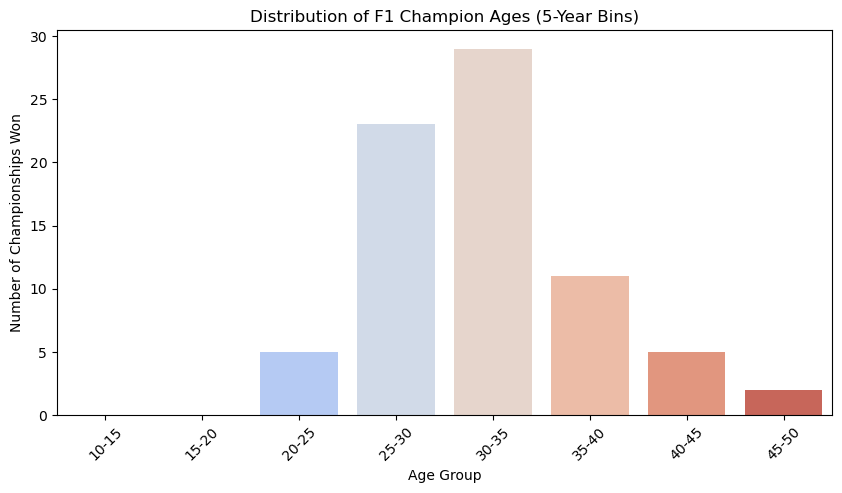

In [16]:
age_distribution = season_champions['age_group'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='coolwarm')
plt.xlabel("Age Group")
plt.ylabel("Number of Championships Won")
plt.title("Distribution of F1 Champion Ages (5-Year Bins)")
plt.xticks(rotation=45)
plt.show()

From this we can see that drivers most frequently win championships at around 30-35 years of age followed by 25-30.
On the whole we can say that most championships are won by drives in age group <b>25-35</b>

14.	Championship Retention Probability:<br>
○	What is the probability that this season’s winner will retain the title in the next season? Analyze historical trends of back-to-back champions.


In [18]:
season_champions = season_champions.sort_values(by='year')
season_champions['retained_title'] = season_champions['Name'] == season_champions['Name'].shift(1)
total_seasons = len(season_champions) - 1  
retained_count = season_champions['retained_title'].sum()
retention_probability = retained_count / total_seasons

print(f"\nOverall Championship Retention Probability: {retention_probability:.2%}")




Overall Championship Retention Probability: 33.78%


In [19]:
season_champions['decade'] = (season_champions['year'] // 10) * 10
retention_trend = season_champions.groupby('decade')['retained_title'].mean().reset_index()

print("\nChampionship Retention Trends by Decade:")
print(retention_trend)



Championship Retention Trends by Decade:
   decade  retained_title
0    1950             0.4
1    1960             0.1
2    1970             0.0
3    1980             0.2
4    1990             0.3
5    2000             0.5
6    2010             0.6
7    2020             0.8


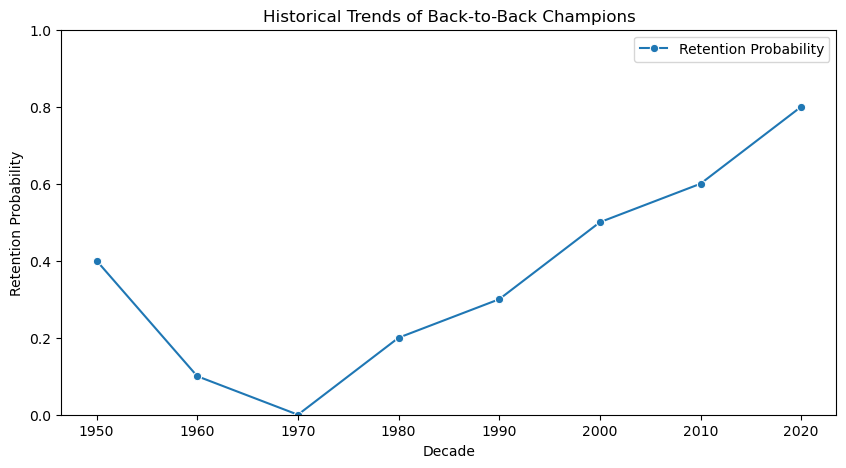

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x=retention_trend['decade'], y=retention_trend['retained_title'], marker='o', label="Retention Probability")

plt.xlabel("Decade")
plt.ylabel("Retention Probability")
plt.title("Historical Trends of Back-to-Back Champions")
plt.ylim(0, 1)  
plt.legend()
plt.show()


From these we can say that with probability <b>0.34</b> 2024 champion will retain their championship in 2025.<br>
Also from the historical decade trends of championship retention,we can see that the probability of retaining championships is <b>increasing</b> from the 1970's.